# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | novodvinsk
Processing Record 5 of Set 1 | marks
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | pechora
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | gargalianoi
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | kenai
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | nagqu
Processing Record 17 of Set 1 | san matias
Processing Record 18 of Set 1 | lazaro cardenas
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | saint-leu
Processing Record 21 of Set 1 | tandil
Processing Record 22 of Set 1 | constitu

Processing Record 41 of Set 4 | kargasok
Processing Record 42 of Set 4 | enewetak
Processing Record 43 of Set 4 | yambio
Processing Record 44 of Set 4 | birobidzhan
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | fonadhoo
City not found. Skipping...
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | frontera
Processing Record 0 of Set 5 | nova vicosa
Processing Record 1 of Set 5 | yaren
Processing Record 2 of Set 5 | san luis de la loma
Processing Record 3 of Set 5 | mejit
Processing Record 4 of Set 5 | qarchi gak
Processing Record 5 of Set 5 | rio claro
Processing Record 6 of Set 5 | el bolson
Processing Record 7 of Set 5 | bundaberg
Processing Record 8 of Set 5 | long beach
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | gobabis
Processing Record 11 of Set 5 | nabire
Processing Record 12 of Set 5 | nova sintra
Processing Record 13 of Set 5 | letterkenny
Processing Record 14 of 

Processing Record 34 of Set 8 | kerikeri
Processing Record 35 of Set 8 | sokur
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | san antonio de pale
Processing Record 38 of Set 8 | center
Processing Record 39 of Set 8 | new norfolk
Processing Record 40 of Set 8 | new kingman-butler
Processing Record 41 of Set 8 | sittwe
Processing Record 42 of Set 8 | kapa'a
Processing Record 43 of Set 8 | mariental
Processing Record 44 of Set 8 | sayre
Processing Record 45 of Set 8 | akureyri
Processing Record 46 of Set 8 | argo
Processing Record 47 of Set 8 | sarvar
Processing Record 48 of Set 8 | salinopolis
Processing Record 49 of Set 8 | aracati
Processing Record 0 of Set 9 | galdar
Processing Record 1 of Set 9 | buka
Processing Record 2 of Set 9 | infanta
Processing Record 3 of Set 9 | lethbridge
Processing Record 4 of Set 9 | al jawf
Processing Record 5 of Set 9 | weno
Processing Record 6 of Set 9 | dampit
Processing Record 7 of Set 9 | amga
Processing Record 8 of Set 9 | q

Processing Record 25 of Set 12 | freetown
Processing Record 26 of Set 12 | peniche
-----------------------------
Data Retrieval Complete      
-----------------------------


In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [55]:
# Convert date column to make it readable
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,3.91,75,75,11.83,SJ,2023-10-19
1,nuuk,64.1835,-51.7216,-3.66,58,75,11.32,GL,2023-10-19
2,port-aux-francais,-49.3500,70.2167,1.32,78,95,10.33,TF,2023-10-19
3,novodvinsk,64.4165,40.8122,3.77,78,100,3.97,RU,2023-10-19
4,marks,51.7111,46.7486,7.87,61,97,3.73,RU,2023-10-19


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,3.91,75,75,11.83,SJ,2023-10-19
1,nuuk,64.1835,-51.7216,-3.66,58,75,11.32,GL,2023-10-19
2,port-aux-francais,-49.3500,70.2167,1.32,78,95,10.33,TF,2023-10-19
3,novodvinsk,64.4165,40.8122,3.77,78,100,3.97,RU,2023-10-19
4,marks,51.7111,46.7486,7.87,61,97,3.73,RU,2023-10-19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

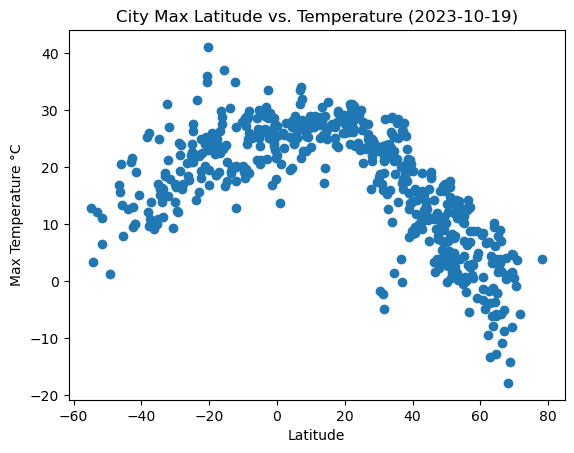

In [59]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', facecolor='tab:blue')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature °C')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

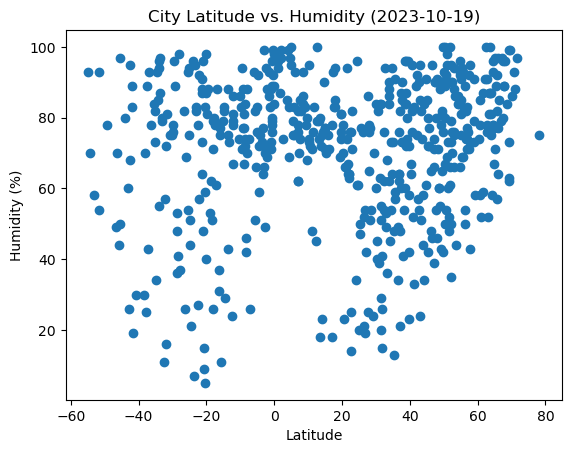

In [60]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', facecolor='tab:blue')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

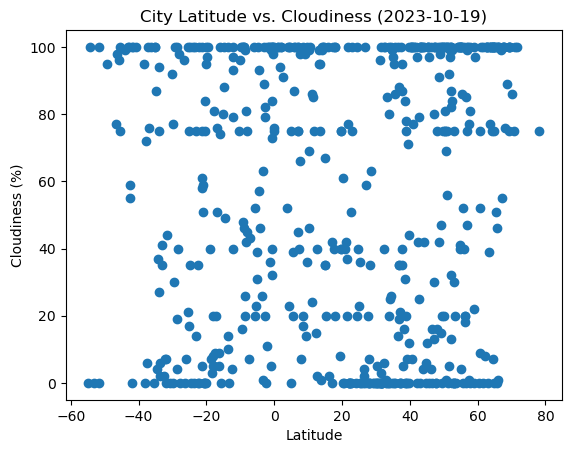

In [61]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', facecolor='tab:blue')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

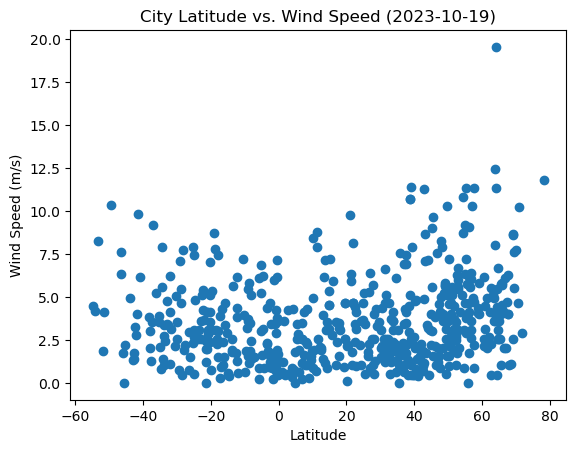

In [62]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', facecolor='tab:blue')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def lin_reg(x, y, annotate):
    (slope,intercept,rvalue,pvalue,stderror) = linregress(x,y)
    reg_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.plot(x, reg_values, color='r')
    plt.annotate(line_eq, annotate, fontsize=15, color='r')
    print(f'The r-value is: {rvalue}')

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,3.91,75,75,11.83,SJ,2023-10-19
1,nuuk,64.1835,-51.7216,-3.66,58,75,11.32,GL,2023-10-19
3,novodvinsk,64.4165,40.8122,3.77,78,100,3.97,RU,2023-10-19
4,marks,51.7111,46.7486,7.87,61,97,3.73,RU,2023-10-19
7,pechora,65.1472,57.2244,1.59,97,100,3.58,RU,2023-10-19


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,1.32,78,95,10.33,TF,2023-10-19
5,port elizabeth,-33.9180,25.5701,16.16,96,75,1.03,ZA,2023-10-19
6,lebu,-37.6167,-73.6500,9.73,89,6,1.28,CL,2023-10-19
8,geraldton,-28.7667,114.6000,24.23,53,100,4.63,AU,2023-10-19
12,grytviken,-54.2811,-36.5092,3.35,70,100,4.19,GS,2023-10-19


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.840638766305158


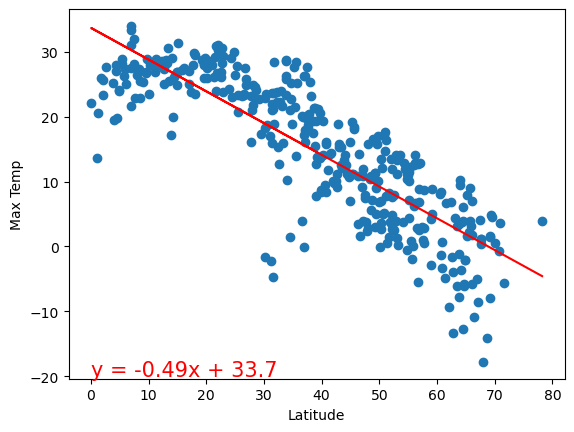

In [66]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
annotate = (0, -20)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
lin_reg(x, y, annotate)
plt.show()

The r-value is: 0.6414284170910909


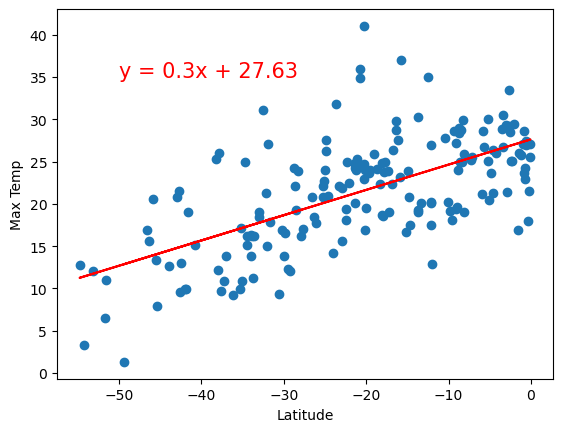

In [67]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
annotate = (-50, 35)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
lin_reg(x, y, annotate)
plt.show()

**Discussion about the linear relationship:** 

The temperature in the northern hemisphere has a negative correlation and decreases as you move away from the equator.

The temperature in the southern hemisphere has a positive correlation and increases as you approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11581242143123457


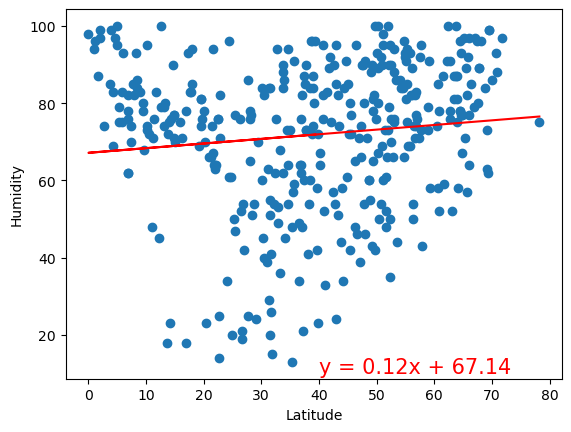

In [68]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
annotate = (40, 10)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_reg(x, y, annotate)
plt.show()

The r-value is: 0.1604257032486141


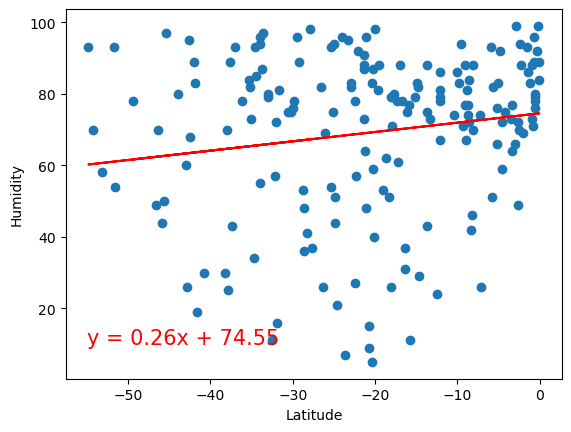

In [69]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
annotate = (-55, 10)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_reg(x, y, annotate)
plt.show()

**Discussion about the linear relationship:** 

The humidity in the northern hemisphere has a positive correlation as you move away from the equator.

The humidity in the southern hemisphere has a slight negative correlation as you approach the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1390617098181964


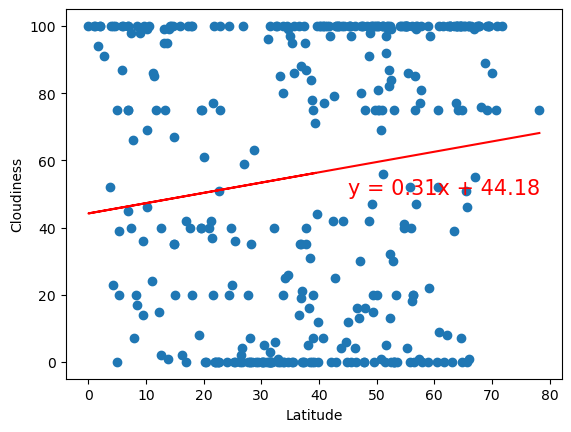

In [70]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
annotate = (45, 50)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_reg(x, y, annotate)
plt.show()

The r-value is: 0.04104763753992224


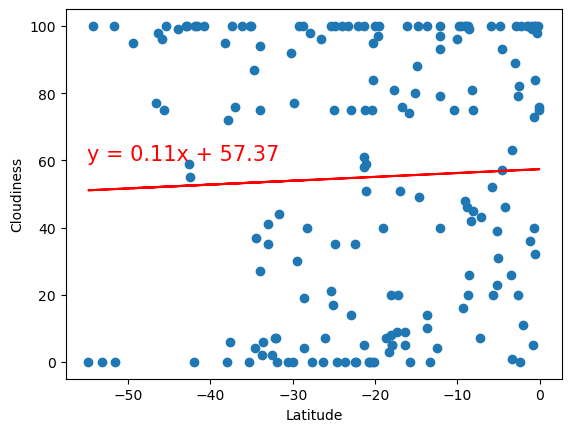

In [71]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
annotate = (-55, 60)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_reg(x, y, annotate)
plt.show()

**Discussion about the linear relationship:** 

The cloudiness in the northern hemisphere has a positive correlation as you move away from the equator.

The cloudiness in the southern hemisphere has a positive correlation as you approach the the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.30586012896866904


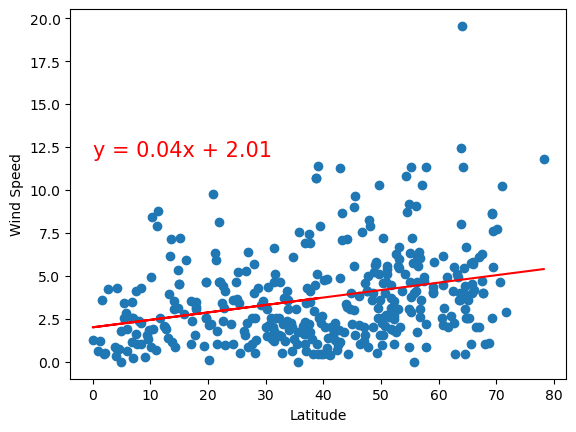

In [72]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
annotate = (0, 12)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lin_reg(x, y, annotate)
plt.show()

The r-value is: -0.21345164274536899


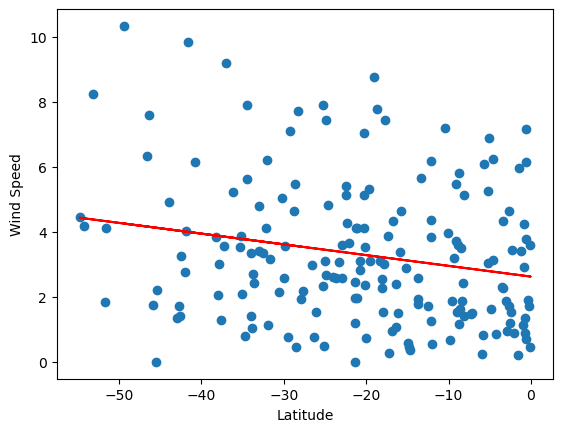

In [73]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
annotate = (-50, 12)

plt.scatter(x, y, marker='o', facecolor='tab:blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lin_reg(x, y, annotate)
plt.show()

**Discussion about the linear relationship:** 

Wind speed in the northern hemisphere has a positive correlation as you move away from the equator.

Wind speed in the southern hemisphere has a negative correlation as you approach the equator.